# CSCI 3360 Homework 3 - Brandon Amirouche

## Instructions

Consider  the  banknote  authentication  dataset  (https://archive.ics.uci.edu/ml/datasets/banknote+authentication). I have already separated the training and testing sets for you,  so please directly work with \banknotetraining.csv" and \banknotetesting.csv" downloaded from eLC and answer the following questions.
1.	How many features are there in the dataset?  What do they represent?  
Note: the class is not considered to be a feature.


2.  For each class (0-forged, 1-authentic) in the training set, obtain the following for each of the features.
    (a)  minimum value
    
    (b)  maximum value
    
    (c)  mean
    
    (d)  standard deviation
    


3.  Create  scatter  plots  for  all  possible  pairs  of  features  in  the  training  set  (there  should  be  a  total  of 6  plots).   Be  sure  to  use  di erent  colors  and  marks  for  the  forged  (class  0)  and  authentic  (class  1) banknotes so that the distinction between the two classes is made obvious.  You may choose to create
a 6-in-1 plot similar to the one created in Week06M, or just create 6 separate plots (but be consistent on your choices of colors and marks).


4.  Based on what your have learned about the dataset so far, which features seem important for distinguishing the two classes?


5.  Using KNeighborsClassifier and GaussianNB from scikit-learn, train the following models on the training set.

    •	k-Nearest Neighbors (kNN) where k = 1.

    •	kNN where k = 3.

    •	kNN where k = 5.

    •	kNN where k = 1000.

    •	Gaussian Naive Bayes Classifier.


Now evaluate your models on the same training set and report the following evaluation metrics.

    (a)  Classifcation Accuracy

    (b)  Confusion Matrix

    (c)  Precision

    (d)  Recall

    (e)  F1 score

6.  Compare and contrast the performance of the models when they are evaluated on the training set.  Be sure to comment on the various kNN models and offer any insights or explanations for their performance.


7.  Next evaluate your models on the testing set, and report the same set of evaluation metrics mentioned in Question 5.


8.  Compare and contrast the performance of the models when they are evaluated on the testing set.  Be sure to comment on the various kNN models and offer any insights or explanations for their performance.


9.  Did the performance of the models change as they are evaluated on the training set vs. the testing set?  Explain why the changes, if any, took place.


10.  Based on everything that you have learned so far, which is the best-performing model for this dataset?

    Justify your choice.


## Academic Honesty Statement

In [2]:
# first fill in your name
first_name = "Brandon"
last_name  = "Amirouche"

print("****************************************************************")
print("CSCI 3360 Homework 3")
print(f"completed by {first_name} {last_name}")
print(f"""
I, {first_name} {last_name}, certify that the following code
represents my own work. I have neither received nor given 
inappropriate assistance. I have not consulted with another
individual, other than a member of the teaching staff, regarding
the specific problems in this homework. I recognize that any 
unauthorized assistance or plagiarism will be handled in 
accordance with the University of Georgia's Academic Honesty
Policy and the policies of this course.
""")
print("****************************************************************")

****************************************************************
CSCI 3360 Homework 3
completed by Brandon Amirouche

I, Brandon Amirouche, certify that the following code
represents my own work. I have neither received nor given 
inappropriate assistance. I have not consulted with another
individual, other than a member of the teaching staff, regarding
the specific problems in this homework. I recognize that any 
unauthorized assistance or plagiarism will be handled in 
accordance with the University of Georgia's Academic Honesty
Policy and the policies of this course.

****************************************************************


## Problem 1

How many features are there in the dataset?  What do they represent?  
Note: the class is not considered to be a feature.

There are 4 different features in the dataset(class not included). The 4 features are: variance of the Wavelet Transformed image, skewness of the Wavelet Transformed image, curtosis of the Wavelet Transformed image, and the entropy of the image.

## Problem 2

For each class (0-forged, 1-authentic) in the training set, obtain the following for each of the features.
    
    (a)  minimum value
    
    (b)  maximum value
    
    (c)  mean
    
    (d)  standard deviation

In [1]:
from typing import List
from collections import Counter
from typing import Dict
import csv
from collections import defaultdict
import pandas as pd
import numpy as np
header_list = ['variance', 'skewness', 'curtosis', 'entropy of image', 'class']
data = pd.read_csv('banknote_training.csv', names=header_list)
df = pd.DataFrame(data)
#print(df)

zero_class = df[df['class'] == 0]
one_class = df[df['class'] == 1]
zero_df = pd.DataFrame(zero_class)
one_df = pd.DataFrame(one_class)
#print(zero_df)
#print(one_df)

print(f"(a)\n")
#Minimum by class
print(f"\tThe Minimum value of each Column in the Forged Class:")
print(f"\t\tForged Class minimum variance = {zero_df.min()[0]}")
print(f"\t\tForged Class minimum skewness = {zero_df.min()[1]}")
print(f"\t\tForged Class minimum curtosis = {zero_df.min()[2]}")
print(f"\t\tForged Class minimum entropy of image = {zero_df.min()[3]}")
print(f"\n")
print(f"\tThe Minimum value of each Column in the Authentic Class:")
print(f"\t\tForged Class minimum variance = {one_df.min()[0]}")
print(f"\t\tForged Class minimum skewness = {one_df.min()[1]}")
print(f"\t\tForged Class minimum curtosis = {one_df.min()[2]}")
print(f"\t\tForged Class minimum entropy of image = {one_df.min()[3]}")

print(f"(b)\n")
#Maximum by class
print(f"\tThe Maximum value of each Column in the Forged Class:")
print(f"\t\tForged Class maximum variance = {zero_df.max()[0]}")
print(f"\t\tForged Class maximum skewness = {zero_df.max()[1]}")
print(f"\t\tForged Class maximum curtosis = {zero_df.max()[2]}")
print(f"\t\tForged Class maximum entropy of image = {zero_df.max()[3]}")
print(f"\n")
print(f"\tThe Maximum value of each Column in the Authentic Class:")
print(f"\t\tForged Class maximum variance = {one_df.max()[0]}")
print(f"\t\tForged Class maximum skewness = {one_df.max()[1]}")
print(f"\t\tForged Class maximum curtosis = {one_df.max()[2]}")
print(f"\t\tForged Class maximum entropy of image = {one_df.max()[3]}")

print(f"(c)\n")
#Mean by class
print(f"\tThe Mean value of each Column in the Forged Class:")
print(f"\t\tForged Class mean variance = {zero_df.mean()[0]}")
print(f"\t\tForged Class mean skewness = {zero_df.mean()[1]}")
print(f"\t\tForged Class mean curtosis = {zero_df.mean()[2]}")
print(f"\t\tForged Class mean entropy of image = {zero_df.mean()[3]}")
print(f"\n")
print(f"\tThe Mean value of each Column in the Authentic Class:")
print(f"\t\tForged Class mean variance = {one_df.mean()[0]}")
print(f"\t\tForged Class mean skewness = {one_df.mean()[1]}")
print(f"\t\tForged Class mean curtosis = {one_df.mean()[2]}")
print(f"\t\tForged Class mean entropy of image = {one_df.mean()[3]}")


print(f"(d)\n")
#Standard Deviation by class
print(f"\tThe Standard Deviation of each Column in the Forged Class:")
print(f"\t\tForged Class standard deviation of variance = {zero_df.std(axis=0)[0]}")
print(f"\t\tForged Class standard deviation of skewness = {zero_df.std(axis=0)[1]}")
print(f"\t\tForged Class standard deviation of curtosis = {zero_df.std(axis=0)[2]}")
print(f"\t\tForged Class standard deviation of entropy of image = {zero_df.std(axis=0)[3]}")
print(f"\n")
print(f"\tThe Standard Deviation of each Column in the Authentic Class:")
print(f"\t\tForged Class standard deviation of variance = {one_df.std(axis=0)[0]}")
print(f"\t\tForged Class standard deviation of skewness = {one_df.std(axis=0)[1]}")
print(f"\t\tForged Class standard deviation of curtosis = {one_df.std(axis=0)[2]}")
print(f"\t\tForged Class standard deviation of entropy of image = {one_df.std(axis=0)[3]}")

      variance  skewness  curtosis  entropy of image  class
0    -0.697450 -1.767200  -0.34474          -0.12372      1
1    -0.873400 -0.033118  -0.20165           0.55774      1
2     2.486000 -0.995330   5.34040          -0.15475      0
3    -4.067900  2.495500   0.79571          -1.10390      1
4     0.007125  8.366100   0.50781          -3.81550      0
...        ...       ...       ...               ...    ...
1024  1.509900  0.039307   6.23320          -0.30346      0
1025 -1.278600 -2.408700   4.57350           0.47627      1
1026 -1.388700 -4.877300   6.47740           0.34179      1
1027 -3.969800  3.681200  -0.60008          -4.01330      1
1028  1.640600  3.548800   1.39640          -0.36424      0

[1029 rows x 5 columns]
(a)

	The Minimum value of each Column in the Forged Class:
		Forged Class minimum variance = -4.2859
		Forged Class minimum skewness = -6.9321
		Forged Class minimum curtosis = -4.9417
		Forged Class minimum entropy of image = -8.5482


	The Minimum valu

## Problem 3

Create  scatter  plots  for  all  possible  pairs  of  features  in  the  training  set  (there  should  be  a  total  of 6  plots).   Be  sure  to  use  different  colors  and  marks  for  the  forged  (class  0)  and  authentic  (class  1) banknotes so that the distinction between the two classes is made obvious.  You may choose to create
a 6-in-1 plot similar to the one created in Week06M, or just create 6 separate plots (but be consistent on your choices of colors and marks).

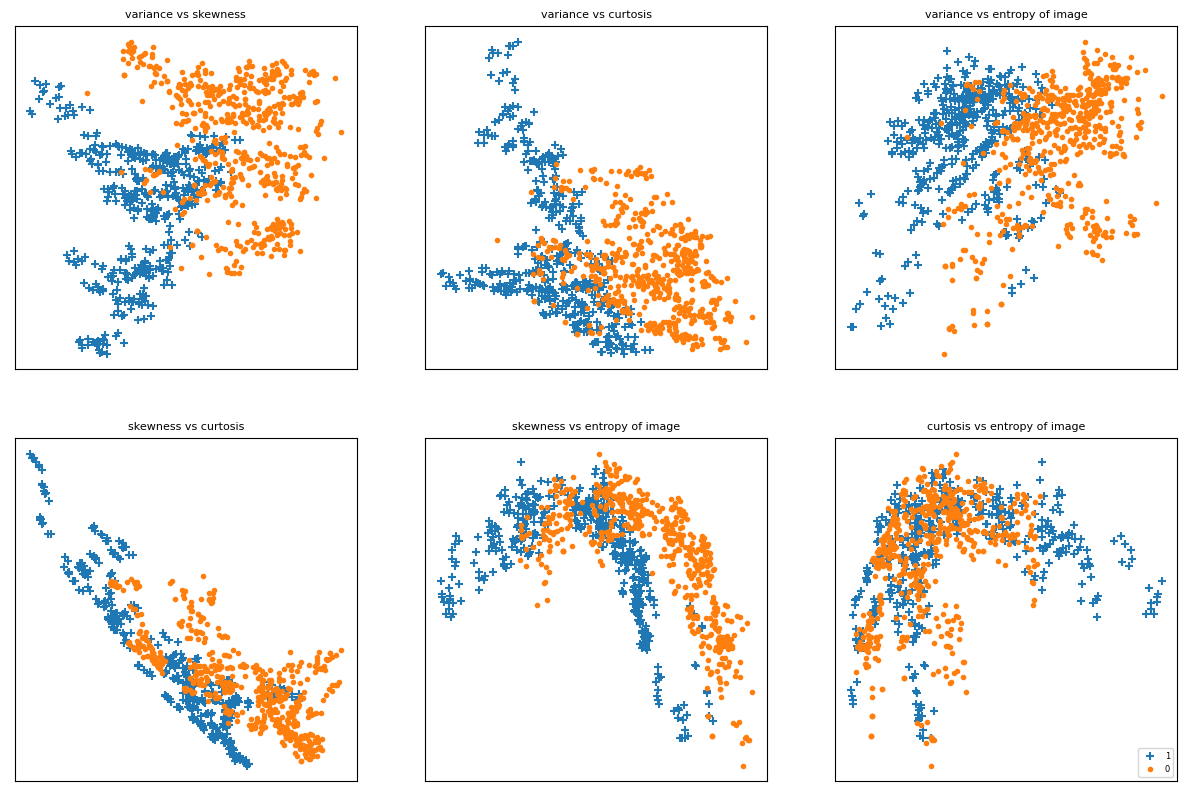

In [3]:
from matplotlib import pyplot as plt
from typing import NamedTuple
from scipy.spatial import distance
Vector = List[float]

class LabeledPoint(NamedTuple):
    point: Vector
    label: str

def parse_banknote_training_row(row: List[str]) -> LabeledPoint:
    """
    'variance', 'skewness', 'curtosis', 'entropy of image', 'class'
    """
    measurements = [float(value) for value in row[:-1]]
    label = row[-1].split("-")[-1]

    return LabeledPoint(measurements, label)

with open('banknote_training.csv') as f:
    reader = csv.reader(f)
    banknote_training_data = [parse_banknote_training_row(row) for row in reader if row]

    
points_by_class: Dict[str, List[Vector]] = defaultdict(list)
for banknote_training in banknote_training_data:
    points_by_class[banknote_training.label].append(banknote_training.point)

    
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100
pairs = [(i, j) for i in range(4) for j in range(4) if i < j]
marks = ['+', '.']  # we have 2 classes, so 2 markers

fig, ax = plt.subplots(2, 3)

for row in range(2):
    for col in range(3):
        i, j = pairs[3 * row + col]
        ax[row][col].set_title(f"{header_list[i]} vs {header_list[j]}", fontsize=8)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

        for mark, (classification, points) in zip(marks, points_by_class.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs, ys, marker=mark, label=classification)

ax[-1][-1].legend(loc='lower right', prop={'size': 6})
plt.show()

## Problem 4

Based on what your have learned about the dataset so far, which features seem important for distinguishing the two classes?

It appears as though the training set does split by class. The variance and skewness seem to be the important features for distinguishing the two classes.

## Problem 5

Using KNeighborsClassifier and GaussianNB from scikit-learn, train the following models on the training set.

    •	k-Nearest Neighbors (kNN) where k = 1.

    •	kNN where k = 3.

    •	kNN where k = 5.

    •	kNN where k = 1000.

    •	Gaussian Naive Bayes Classifier.

Now evaluate your models on the same training set and report the following evaluation metrics.

    (a)  Classification Accuracy

    (b)  Confusion Matrix

    (c)  Precision

    (d)  Recall

    (e)  F1 score

In [5]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



# fit a k-nearest neighbor model to the data
model1 = KNeighborsClassifier(n_neighbors=1)
model3 = KNeighborsClassifier(n_neighbors=3)
model5 = KNeighborsClassifier(n_neighbors=5)
modelK = KNeighborsClassifier(n_neighbors=1000)
modelG = GaussianNB()

# preprocessing may be needed on target to convert strings to ints
model1.fit(df[['variance', 'skewness', 'curtosis', 'entropy of image']], df['class'])
model3.fit(df[['variance', 'skewness', 'curtosis', 'entropy of image']], df['class'])
model5.fit(df[['variance', 'skewness', 'curtosis', 'entropy of image']], df['class'])
modelK.fit(df[['variance', 'skewness', 'curtosis', 'entropy of image']], df['class'])
modelG.fit(df[['variance', 'skewness', 'curtosis', 'entropy of image']], df['class'])

#making predictions for each model

#neighbors=1
expected1 = df['class']
predicted1 = model1.predict(df[['variance', 'skewness', 'curtosis', 'entropy of image']])

#neighbors=3
expected3 = df['class']
predicted3 = model3.predict(df[['variance', 'skewness', 'curtosis', 'entropy of image']])

#neighbors=5
expected5 = df['class']
predicted5 = model5.predict(df[['variance', 'skewness', 'curtosis', 'entropy of image']])

#neighbors=1000
expectedK = df['class']
predictedK = modelK.predict(df[['variance', 'skewness', 'curtosis', 'entropy of image']])

#GaussianNB
expectedG = df['class']
predictedG = modelG.predict(df[['variance', 'skewness', 'curtosis', 'entropy of image']])

#Printing report and matrix for neighbors=1
print(f"K = 1: precision, recall, f1-score, accuracy\n")
print(metrics.classification_report(expected1, predicted1))
print(f"K = 1: confusion matrix\n")
print(metrics.confusion_matrix(expected1, predicted1))
print(f"\n")

#Printing report and matrix for neighbors=3
print(f"K = 3: precision, recall, f1-score, accuracy\n")
print(metrics.classification_report(expected3, predicted3))
print(f"K = 3: confusion matrix\n")
print(metrics.confusion_matrix(expected3, predicted3))
print(f"\n")

#Printing report and matrix for neighbors=5
print(f"K = 5: precision, recall, f1-score, accuracy\n")
print(metrics.classification_report(expected5, predicted5))
print(f"K = 5: confusion matrix\n")
print(metrics.confusion_matrix(expected5, predicted5))
print(f"\n")

#Printing report and matrix for neighbors=1000
print(f"K = 1000: precision, recall, f1-score, accuracy\n")
print(metrics.classification_report(expectedK, predictedK))
print(f"K = 1000: confusion matrix\n")
print(metrics.confusion_matrix(expectedK, predictedK))
print(f"\n")

#Printing report and matrix for Gaussian
print(f"GaussianNB: precision, recall, f1-score, accuracy\n")
print(metrics.classification_report(expectedG, predictedG))
print(f"GaussianNB: confusion matrix\n")
print(metrics.confusion_matrix(expectedG, predictedG))
print(f"\n")


K = 1: precision, recall, f1-score, accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       462

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029

K = 1: confusion matrix

[[567   0]
 [  0 462]]


K = 3: precision, recall, f1-score, accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       462

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029

K = 3: confusion matrix

[[567   0]
 [  0 462]]


K = 5: precision, recall, f1-score, accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567

C:\Users\Brandon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Problem 6

Compare and contrast the performance of the models when they are evaluated on the training set.  Be sure to comment on the various kNN models and offer any insights or explanations for their performance.

Each of the models regarding KNN (K-Nearest Nieghbors) reports the same statistics, except for when K = 1000 neighbors. When 1000 nieghbors is used, which nearly totals the number of sample rows in the dataset, you see the impact on the results. The precision, recall, f1-score, and overall classification accuracy values all go down when using a KNN value of 1000. This is most likely due to using a high amount of nieghbors, as using a high KNN value will simply predict the most common class in the dataset. The Gaussian Naive Bayes Classifier (GaussianNB) does a better job of evaluating the data then using a KNN value of 1000. However, GaussianNB still doesn't have scores as high as the other KNN models (using 1, 3, and 5 as KNN values) for precision, recall, f1-score, and overall classification accuracy.

## Problem 7

Next evaluate your models on the testing set, and report the same set of evaluation metrics mentioned in Question 5.

In [11]:
#header_list = ['variance', 'skewness', 'curtosis', 'entropy of image', 'class']
data1 = pd.read_csv('banknote_testing.csv', names=header_list)
df1 = pd.DataFrame(data1)
#print(df)
#print(df1)

# fit a k-nearest neighbor model to the data
#modelTEST1 = KNeighborsClassifier(n_neighbors=1)
#modelTEST3 = KNeighborsClassifier(n_neighbors=3)
#modelTEST5 = KNeighborsClassifier(n_neighbors=5)
#modelTESTK = KNeighborsClassifier(n_neighbors=1000)
#modelTESTG = GaussianNB()

# preprocessing may be needed on target to convert strings to ints
#model1.fit(df1[['variance', 'skewness', 'curtosis', 'entropy of image']], df1['class'])
#model3.fit(df1[['variance', 'skewness', 'curtosis', 'entropy of image']], df1['class'])
#model5.fit(df1[['variance', 'skewness', 'curtosis', 'entropy of image']], df1['class'])
#modelK.fit(df1[['variance', 'skewness', 'curtosis', 'entropy of image']], df1['class'])
#modelG.fit(df1[['variance', 'skewness', 'curtosis', 'entropy of image']], df1['class'])

#making predictions for each model

#neighbors=1
expectedTEST1 = df1['class']
predictedTEST1 = model1.predict(df1[['variance', 'skewness', 'curtosis', 'entropy of image']])

#neighbors=3
expectedTEST3 = df1['class']
predictedTEST3 = model3.predict(df1[['variance', 'skewness', 'curtosis', 'entropy of image']])

#neighbors=5
expectedTEST5 = df1['class']
predictedTEST5 = model5.predict(df1[['variance', 'skewness', 'curtosis', 'entropy of image']])

#neighbors=1000
expectedTESTK = df1['class']
predictedTESTK = modelK.predict(df1[['variance', 'skewness', 'curtosis', 'entropy of image']])

#GaussianNB
expectedTESTG = df1['class']
predictedTESTG = modelG.predict(df1[['variance', 'skewness', 'curtosis', 'entropy of image']])

#Printing report and matrix for neighbors=1 on the testing set
print(f"K = 1: precision, recall, f1-score, accuracy\n")
print(metrics.classification_report(expectedTEST1, predictedTEST1))
print(f"K = 1: confusion matrix\n")
print(metrics.confusion_matrix(expectedTEST1, predictedTEST1))
print(f"\n")

#Printing report and matrix for neighbors=3 on the testing set
print(f"K = 3: precision, recall, f1-score, accuracy\n")
print(metrics.classification_report(expectedTEST3, predictedTEST3))
print(f"K = 3: confusion matrix\n")
print(metrics.confusion_matrix(expectedTEST3, predictedTEST3))
print(f"\n")

#Printing report and matrix for neighbors=5 on the testing set
print(f"K = 5: precision, recall, f1-score, accuracy\n")
print(metrics.classification_report(expectedTEST5, predictedTEST5))
print(f"K = 5: confusion matrix\n")
print(metrics.confusion_matrix(expectedTEST5, predictedTEST5))
print(f"\n")

#Printing report and matrix for neighbors=1000 on the testing set
print(f"K = 1000: precision, recall, f1-score, accuracy\n")
print(metrics.classification_report(expectedTESTK, predictedTESTK))
print(f"K = 1000: confusion matrix\n")
print(metrics.confusion_matrix(expectedTESTK, predictedTESTK))
print(f"\n")

#Printing report and matrix for Gaussian on the testing set
print(f"GaussianNB: precision, recall, f1-score, accuracy\n")
print(metrics.classification_report(expectedTESTG, predictedTESTG))
print(f"GaussianNB: confusion matrix\n")
print(metrics.confusion_matrix(expectedTESTG, predictedTESTG))
print(f"\n")

K = 1: precision, recall, f1-score, accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00       148

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343

K = 1: confusion matrix

[[195   0]
 [  0 148]]


K = 3: precision, recall, f1-score, accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00       148

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343

K = 3: confusion matrix

[[195   0]
 [  0 148]]


K = 5: precision, recall, f1-score, accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195

C:\Users\Brandon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Problem 8

Compare and contrast the performance of the models when they are evaluated on the testing set.  Be sure to comment on the various kNN models and offer any insights or explanations for their performance.

Much like with the training set, each of the models regarding KNN reports the same high scoring statistics, except when attempting to utilize the K = 1000 nieghbors model. This model is possible to use, however the numbers reported are significantly lower than our other KNN models. The GaussianNB model, while still getting numbers higher than the K = 1000 nieghbors model, does not have as high scores as the other working KNN models.

## Problem 9

Did the performance of the models change as they are evaluated on the training set vs. the testing set?  Explain why the changes, if any, took place.

Performance with the KNN models using KNN values of 1, 3, and 5 all remain relatively the same on each dataset (dsregarding the amount of sample rows), posting near perfect numbers for precision, recall, f1-score, and overall classification accuracy. The KNN model using 1000 nieghbors is obviously not recommended, as the numbers reported in both the training and testing sets are inadequate. The Gaussian Naive Bayes Classifier, while working on both, doesnt give as high of a score on any attribute as the other KNN models do. Some of the numbers within GaussianNB actually have lower scores on the training set over the testing set and vice versa.

## Problem 10

Based on everything that you have learned so far, which is the best-performing model for this dataset?

Justify your choice.

 I believe the best model to use from these choices is the KNN model using 5 nieghbors. The KNN model using 1000 neighbors isn't practical for the testing set because of its low scores, so we may ignore this model. The GaussianNB model, while useable on both, doesn't pose numbers as high as the working KNN models do within the classification report categories. The KNN models using 1 and 3 nieghbors seem to present numbers equal to those within the classification report for the KNN model using 5. However, 1 and 3 can be considered too small to utilize on the training and testing sets, meaning we let outliers have too much influence. The use of the KNN model with 5 nieghbors seems to be the best balance between getting accurate results and making sure to avoid any outliers.